# Parte 5 - Defeting ITLA CAPTCHA

Probaremos con una imagen del CAPTCHA del ITLA 

![title](img/itla-captcha.png)

https://www.itla.edu.do/foro/posting.php?mode=post&f=2&sid=864994e827c3062e96a3bd2178a3e345

In [1]:
from imutils import paths
import numpy as np
import imutils
import cv2
import pickle
import requests
import re
from bs4 import BeautifulSoup
import urllib
from keras.models import load_model
from helpers import resize_to_fit
from imutils import paths

import matplotlib.pyplot as plt
%matplotlib inline


MODEL_FILENAME = "captcha_model.hdf5"
MODEL_LABELS_FILENAME = "model_labels.dat"
CAPTCHA_IMAGE_FOLDER = "generated_captcha_images"

# Load up the model labels (so we can translate model predictions to actual letters)
with open(MODEL_LABELS_FILENAME, "rb") as f:
    lb = pickle.load(f)

# Load the trained neural netw ork
model = load_model(MODEL_FILENAME)

Using TensorFlow backend.


(20, 20)


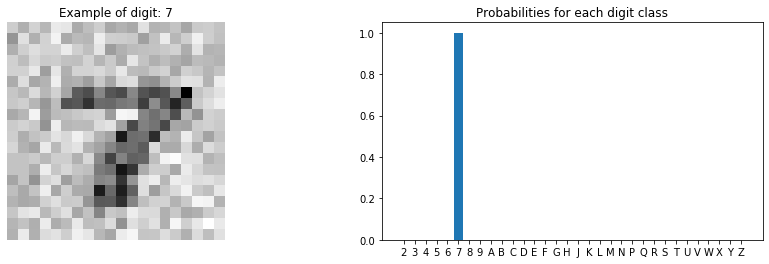

In [47]:
# Probar con CAPTCHA ITLA
model = load_model(MODEL_FILENAME)

with open(MODEL_LABELS_FILENAME, "rb") as f:
    lb = pickle.load(f)

#image = cv2.imread('img/R-itla.png')
image = cv2.imread('img/7-itla.png')
image = cv2.resize(image, (20,20))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    
print(image.shape)

prediction = model.predict(image.reshape(1,20,20,1))

letter = lb.inverse_transform(prediction)[0]

plt.figure(figsize=(15,4));
plt.subplot(1,2,1);
plt.title('Example of digit: {}'.format(letter));
plt.imshow(image,cmap='gray'); plt.axis('off');
probs = model.predict_proba(image.reshape(1,20,20,1),batch_size=1)
plt.subplot(1,2,2);
plt.title('Probabilities for each digit class');
plt.bar(np.arange(32),probs.reshape(32),align='center'); 
plt.xticks(np.arange(32),('2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','J','K','L','M','N','P','Q','R','S','T','U','V','W','X','Y','Z'));